<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.923303,35.112571,26.657083,87.264498,0.105620,202.063075,201.960970,0.102105
1,0.0,1.0,63.984001,80.154199,21.358757,50.300953,-0.003432,225.794479,225.822227,-0.027748
2,0.0,2.0,95.666100,63.203138,30.955611,29.093113,0.036872,228.954835,228.932325,0.022509
3,0.0,3.0,30.953217,79.750331,75.873794,45.573722,0.043568,242.194632,242.156049,0.038583
4,0.0,4.0,53.401695,50.377463,56.323093,80.008288,-0.169697,249.940842,250.124077,-0.183234
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,20.281212,34.727394,91.101405,30.052006,-0.015228,186.146789,186.185964,-0.039175
59996,999.0,56.0,56.151628,81.523471,95.092171,76.967683,0.008824,319.743777,319.735030,0.008747
59997,999.0,57.0,95.038426,46.209374,94.951233,48.391396,0.004342,294.594771,294.611267,-0.016496
59998,999.0,58.0,45.061694,62.201560,47.620707,42.286371,-0.024155,207.146178,207.154196,-0.008018


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.923303  35.112571  26.657083  87.264498  0.105620  202.063075   
      1.0    63.984001  80.154199  21.358757  50.300953 -0.003432  225.794479   
      2.0    95.666100  63.203138  30.955611  29.093113  0.036872  228.954835   
      3.0    30.953217  79.750331  75.873794  45.573722  0.043568  242.194632   
      4.0    53.401695  50.377463  56.323093  80.008288 -0.169697  249.940842   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   20.281212  34.727394  91.101405  30.052006 -0.015228  186.146789   
      56.0   56.151628  81.523471  95.092171  76.967683  0.008824  319.743777   
      57.0   95.038426  46.209374  94.951233  48.391396  0.004342  294.594771   
      58.0   45.061694  62.201560  47.620707  42.286371 -0.024155  207.146178   
      59.0   32.906581  26.954480  57.469387  55.556487  0.118825  183.005759   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.960970  0.102105  
      1.0    225.822227 -0.027748  
      2.0    228.932325  0.022509  
      3.0    242.156049  0.038583  
      4.0    250.124077 -0.183234  
...                 ...       ...  
999.0 55.0   186.185964 -0.039175  
      56.0   319.735030  0.008747  
      57.0   294.611267 -0.016496  
      58.0   207.154196 -0.008018  
      59.0   182.912827  0.092932  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.923303  35.112571  26.657083  87.264498  0.105620  202.063075   
      1.0    63.984001  80.154199  21.358757  50.300953 -0.003432  225.794479   
      2.0    95.666100  63.203138  30.955611  29.093113  0.036872  228.954835   
      3.0    30.953217  79.750331  75.873794  45.573722  0.043568  242.194632   
      4.0    53.401695  50.377463  56.323093  80.008288 -0.169697  249.940842   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   20.281212  34.727394  91.101405  30.052006 -0.015228  186.146789   
      56.0   56.151628  81.523471  95.092171  76.967683  0.008824  319.743777   
      57.0   95.038426  46.209374  94.951233  48.391396  0.004342  294.594771   
      58.0   45.061694  62.201560  47.620707  42.286371 -0.024155  207.146178   
      59.0   32.906581  26.954480  57.469387  55.556487  0.118825  183.005759   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.960970  0.102105  
      1.0    225.822227 -0.027748  
      2.0    228.932325  0.022509  
      3.0    242.156049  0.038583  
      4.0    250.124077 -0.183234  
...                 ...       ...  
999.0 55.0   186.185964 -0.039175  
      56.0   319.735030  0.008747  
      57.0   294.611267 -0.016496  
      58.0   207.154196 -0.008018  
      59.0   182.912827  0.092932  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,42.923303,35.112571,26.657083,87.264498,0.105620,202.063075,201.960970,0.102105
1,0.0,1.0,63.984001,80.154199,21.358757,50.300953,-0.003432,225.794479,225.822227,-0.027748
2,0.0,2.0,95.666100,63.203138,30.955611,29.093113,0.036872,228.954835,228.932325,0.022509
3,0.0,3.0,30.953217,79.750331,75.873794,45.573722,0.043568,242.194632,242.156049,0.038583
4,0.0,4.0,53.401695,50.377463,56.323093,80.008288,-0.169697,249.940842,250.124077,-0.183234
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,20.281212,34.727394,91.101405,30.052006,-0.015228,186.146789,186.185964,-0.039175
59996,999.0,56.0,56.151628,81.523471,95.092171,76.967683,0.008824,319.743777,319.735030,0.008747
59997,999.0,57.0,95.038426,46.209374,94.951233,48.391396,0.004342,294.594771,294.611267,-0.016496
59998,999.0,58.0,45.061694,62.201560,47.620707,42.286371,-0.024155,207.146178,207.154196,-0.008018


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    42.923303  35.112571  26.657083  87.264498  0.105620  202.063075   
      1.0    63.984001  80.154199  21.358757  50.300953 -0.003432  225.794479   
      2.0    95.666100  63.203138  30.955611  29.093113  0.036872  228.954835   
      3.0    30.953217  79.750331  75.873794  45.573722  0.043568  242.194632   
      4.0    53.401695  50.377463  56.323093  80.008288 -0.169697  249.940842   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   20.281212  34.727394  91.101405  30.052006 -0.015228  186.146789   
      56.0   56.151628  81.523471  95.092171  76.967683  0.008824  319.743777   
      57.0   95.038426  46.209374  94.951233  48.391396  0.004342  294.594771   
      58.0   45.061694  62.201560  47.620707  42.286371 -0.024155  207.146178   
      59.0   32.906581  26.954480  57.469387  55.556487  0.118825  183.005759   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.960970  0.102105  
      1.0    225.822227 -0.027748  
      2.0    228.932325  0.022509  
      3.0    242.156049  0.038583  
      4.0    250.124077 -0.183234  
...                 ...       ...  
999.0 55.0   186.185964 -0.039175  
      56.0   319.735030  0.008747  
      57.0   294.611267 -0.016496  
      58.0   207.154196 -0.008018  
      59.0   182.912827  0.092932  

[60000 rows x 8 columns]

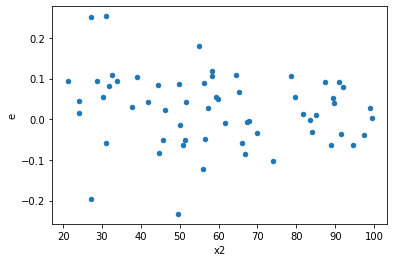

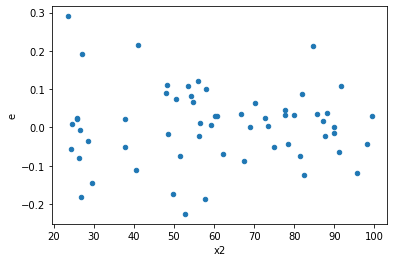

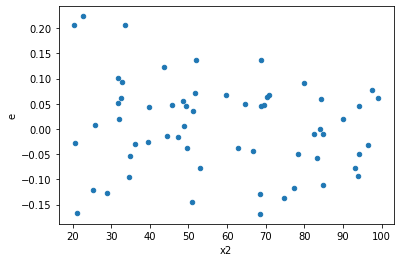

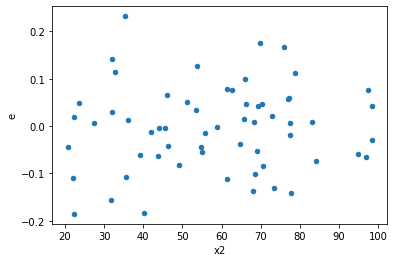

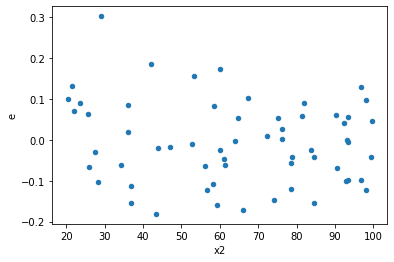

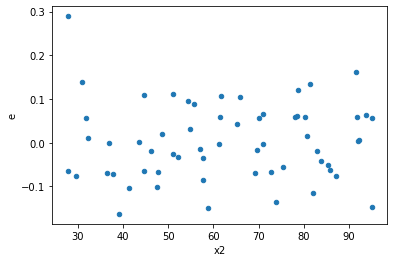

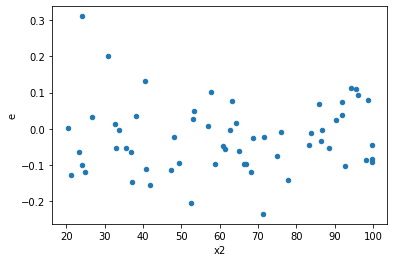

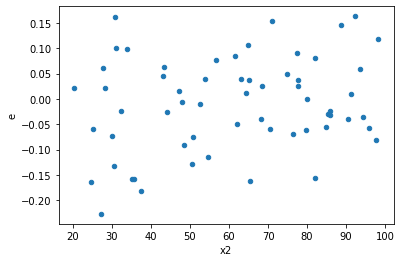

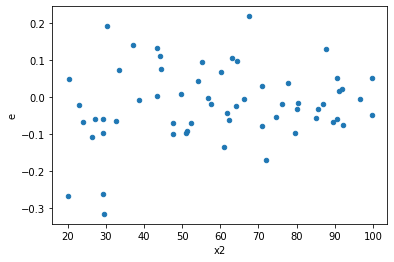

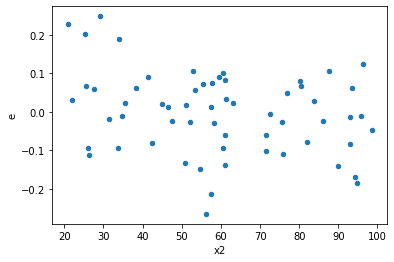

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,22.0,30.0,0.2018810768491135,0.30251960631793845,0.009176412584050614,0.010083986877264615,1.0989029519870808,0.7977295437000975,0.6011352281499512,0.39886477185004876,Reject005=1 : Homoscedasticity
4.0,33.0,19.0,0.2585765305767738,0.42673176738345936,0.00783565244172042,0.022459566704392597,2.8663301328691024,0.01802768016429357,0.9909861599178532,0.009013840082146785,Reject005=0 : Heteroscedasticity
5.0,27.0,25.0,0.23906611558556198,0.25291153229155466,0.008854300577243037,0.010116461291662186,1.1425477600865621,0.7408109594095924,0.6295945202952038,0.3704054797047962,Reject005=1 : Homoscedasticity
6.0,27.0,25.0,0.2285580994930639,0.28093691831989054,0.008465114796039404,0.01123747673279562,1.3275043521032142,0.4793704635314613,0.7603147682342694,0.23968523176573064,Reject005=1 : Homoscedasticity
8.0,21.0,31.0,0.14769079776178376,0.25506459808463805,0.007032895131513513,0.008227890260794776,1.1699151070697247,0.6771611590482611,0.6614194204758694,0.33858057952413056,Reject005=1 : Homoscedasticity
9.0,30.0,22.0,0.23103676926157823,0.41804509954619506,0.007701225642052608,0.019002049979372503,2.4674059510231263,0.031600036984642976,0.9841999815076785,0.015800018492321488,Reject005=0 : Heteroscedasticity
10.0,28.0,24.0,0.12215348364012944,0.255211702878542,0.004362624415718909,0.010633820953272583,2.4374825655305132,0.029692202927037448,0.9851538985364813,0.014846101463518724,Reject005=0 : Heteroscedasticity
11.0,25.0,27.0,0.18775437456025226,0.3259066105038011,0.0075101749824100904,0.012070615203844485,1.607234882291771,0.22995930410630505,0.8850203479468475,0.11497965205315253,Reject005=1 : Homoscedasticity
13.0,19.0,33.0,0.06144845173167765,0.3298738494560008,0.00323412903850935,0.009996177256242448,3.0908405747625363,0.004370892054739395,0.9978145539726303,0.0021854460273696974,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,21.0,0.4651930949551034,0.23603096837248272,0.015006228869519465,0.011239569922499177,0.7489936359246728,0.45488690518846664,Reject005=1 : Homoscedasticity
1.0,30.0,22.0,0.44395638004685356,0.24202688000638106,0.014798546001561785,0.011001221818471867,0.7433988323792647,0.4445464200936842,Reject005=1 : Homoscedasticity
2.0,37.0,15.0,0.7679870901540297,0.09665844737214102,0.0207564078420008,0.006443896491476068,0.3104533568875429,0.003791964785603876,Reject005=0 : Heteroscedasticity
3.0,22.0,30.0,0.2018810768491135,0.30251960631793845,0.009176412584050614,0.010083986877264615,1.0989029519870808,0.7977295437000975,Reject005=1 : Homoscedasticity
4.0,33.0,19.0,0.2585765305767738,0.42673176738345936,0.00783565244172042,0.022459566704392597,2.8663301328691024,0.01802768016429357,Reject005=0 : Heteroscedasticity
5.0,27.0,25.0,0.23906611558556198,0.25291153229155466,0.008854300577243037,0.010116461291662186,1.1425477600865621,0.7408109594095924,Reject005=1 : Homoscedasticity
6.0,27.0,25.0,0.2285580994930639,0.28093691831989054,0.008465114796039404,0.01123747673279562,1.3275043521032142,0.4793704635314613,Reject005=1 : Homoscedasticity
7.0,26.0,26.0,0.24047170759542008,0.15693809329245,0.00924891183059308,0.006036080511248077,0.6526260193423227,0.2830067294468352,Reject005=1 : Homoscedasticity
8.0,21.0,31.0,0.14769079776178376,0.25506459808463805,0.007032895131513513,0.008227890260794776,1.1699151070697247,0.6771611590482611,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      782
Reject005=0 : Heteroscedasticity    218
Name: Result_test, dtype: int64